# PCA Analysis 

PCA is the most populat dimensionality reduction algorithm.   
It account for axis with the largest variance

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
# add the path to the root folder
path_to_main = "../../"

: 

In [41]:
import sys

sys.path.append(path_to_main)

In [72]:
import pandas as pd
from src.data.load_traning_data import load, combine
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [53]:
data = load(path_to_data_folder=path_to_main)
combined_df = combine(data)
combine_X = combined_df.drop("ZAT", axis=1)

In [63]:
combined_df.head()

,AHU 1#setpoint,AHU 1#fan,AHU 1#sensor,Primary HW1#sensor,Primary HW1#setpoint,Secondary HW.Radiators.HeatingCurve#sensor,Secondary HW.Radiators.HeatingCurve#setpoint,DD,FH,temperature,ghi,R,S,U,ZAT
datetime,,,,,,,,,,,,,,,
2020-06-09 00:00:00+00:00,22.200001,1.000000,20.945000,29.256666,20.000000,29.256666,20.000000,10,4.0,11.2,0.00000,0.0,0.0,71,21.182708
2020-06-09 01:00:00+00:00,22.200001,1.000000,20.795000,28.205000,20.000000,28.205000,20.000000,360,3.0,9.8,0.00000,0.0,0.0,76,21.016407
2020-06-09 02:00:00+00:00,22.200001,1.000000,20.643333,27.343334,20.000000,27.343334,20.000000,330,2.0,9.4,0.00000,0.0,0.0,82,20.873104
2020-06-09 03:00:00+00:00,22.200001,0.000000,20.831667,26.678333,20.000000,26.678333,20.000000,350,2.0,11.0,5.55556,0.0,0.0,75,20.929021
2020-06-09 04:00:00+00:00,22.200001,0.196429,20.553572,37.416073,40.049999,37.416073,38.455357,360,3.0,11.3,19.44446,0.0,0.0,72,21.080411


In [66]:
combine_X = combined_df.drop("ZAT", axis=1)

## Right number of Dimensions:

- explained_variance_ratio_: indicates the variance that lies aling the acis of each of the principal component. 
1. Fit the data to the pca without reducing the dimensionality 
2. Plot the cumsum of explained_variance_ratio_ and you can use the elbow method to select dimensionality to explain 0.95 of variance. 

In [74]:
pca = PCA()
X_reduced = pca.fit_transform(combine_X)

In [75]:
X_reduced

array([[-1.26022794e+02, -1.80374498e+02, -1.63014610e+01, ...,
        -7.59383978e-02,  1.41087614e-03,  3.38773844e-13],
       [-1.25274642e+02,  1.69642018e+02, -1.80002545e+01, ...,
         1.94041740e-02,  8.29822315e-03,  2.22557082e-13],
       [-1.25642248e+02,  1.39700633e+02, -1.85431571e+01, ...,
         3.97582335e-02,  8.78116287e-03,  1.57270258e-13],
       ...,
       [-1.25834795e+02,  1.29757649e+02, -1.61567399e+01, ...,
        -8.78974523e-02, -6.21860014e-03,  1.89448444e-14],
       [-1.25932572e+02,  1.39779730e+02, -1.73944494e+01, ...,
        -8.31605246e-02, -4.90591777e-03, -6.97874156e-15],
       [-1.25969383e+02,  1.09760214e+02, -1.84370287e+01, ...,
        -6.41043324e-02,  2.04318738e-03, -3.92469098e-14]])

In [76]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

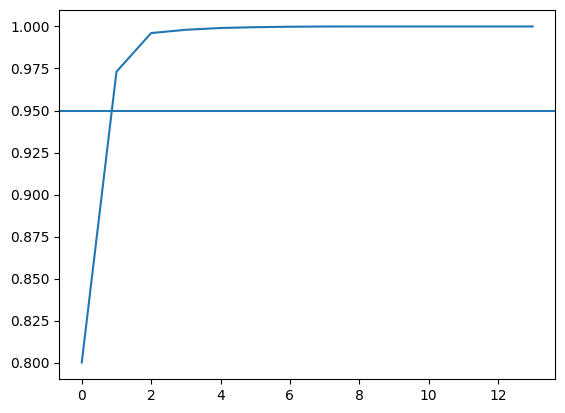

In [78]:
plt.plot(cumsum)
plt.axhline(0.95)

# Another method 
Set n_component between 0 - 1 to specify the variance to be captured

In [79]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(combine_X)

## Transform back to the original Data


In [91]:
recovered_X = pca.inverse_transform(X_reduced)

In [92]:
recovered_X = pd.DataFrame(recovered_X, columns=combine_X.columns)

In [93]:
recovered_X.head()

,AHU 1#setpoint,AHU 1#fan,AHU 1#sensor,Primary HW1#sensor,Primary HW1#setpoint,Secondary HW.Radiators.HeatingCurve#sensor,Secondary HW.Radiators.HeatingCurve#setpoint,DD,FH,temperature,ghi,R,S,U
0,22.191083,0.330613,21.283561,33.653811,31.673476,33.653811,30.842976,9.836031,3.835965,9.355502,0.931994,0.143986,0.010010,83.769493
1,22.161020,0.396313,21.221466,34.202534,32.181400,34.202534,30.888407,359.827773,5.512083,9.910837,0.868804,0.379659,0.004946,87.491578
2,22.163361,0.390487,21.226091,34.158167,32.141070,34.158167,30.887088,329.887644,5.368310,9.858566,0.571044,0.359616,0.005383,87.187806
3,22.166156,0.398238,21.235980,34.139091,32.108981,34.139091,30.839489,349.813703,5.471337,9.983326,6.493933,0.370731,0.005026,87.113638
4,22.175531,0.409232,21.264690,34.040544,31.984978,34.040544,30.726793,359.857842,5.536702,10.210841,19.954287,0.372265,0.004725,86.570623


## Incremental PCA 
To be used for large datasets, mini batches can be passed. 

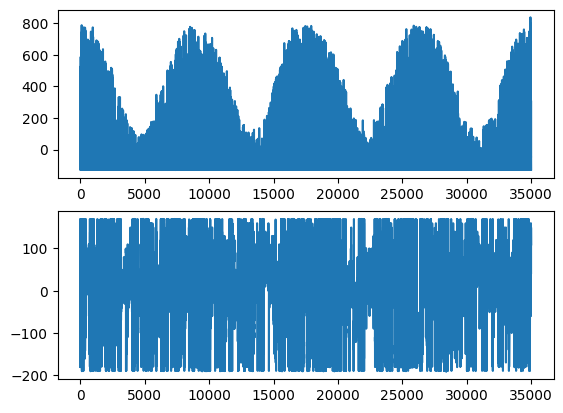

In [112]:
fig, ax = plt.subplots(len(X_reduced[0]), 1)
for i, axes in enumerate(fig.axes):
    axes.plot(X_reduced[:, i])

In [105]:
X_reduced[:, 0]

array([-126.02279449, -125.2746419 , -125.64224806, ..., -125.83479478,
       -125.93257186, -125.96938261])

# Always Normalize DATAFrame

In [114]:
import pandas as pd
from sklearn import preprocessing

# Assuming 'df' is your DataFrame
x = combine_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

In [119]:
pca = PCA(n_components=0.95)
X_norm_reduced = pca.fit_transform(df_normalized)

In [130]:
len(X_norm_reduced[0])

7

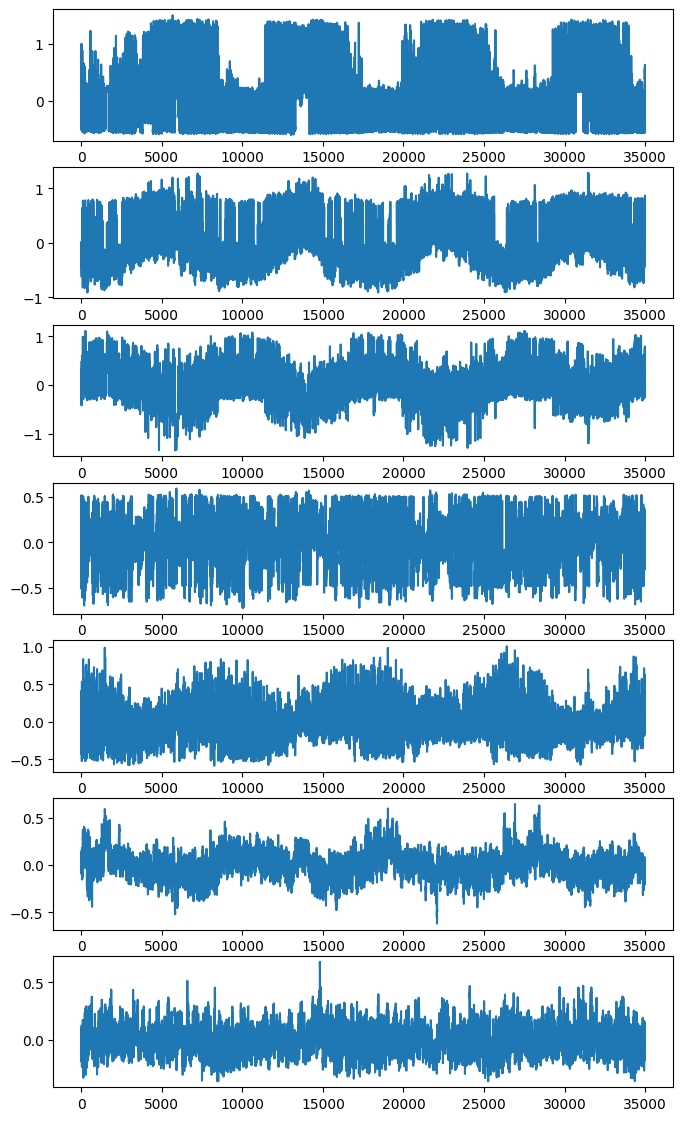

In [129]:
fig, ax = plt.subplots(
    len(X_norm_reduced[0]), 1, figsize=(8, len(X_norm_reduced[0]) * 2)
)
for i, axes in enumerate(fig.axes):
    axes.plot(X_norm_reduced[:, i])

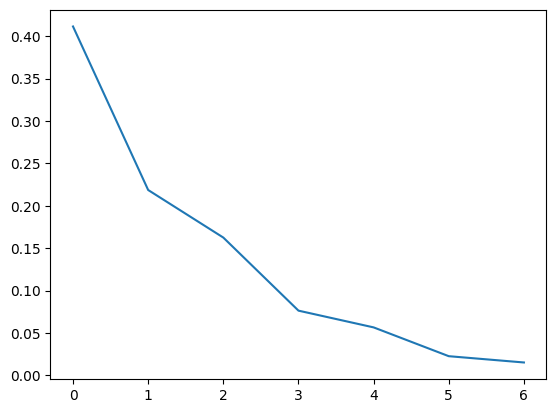

In [131]:
plt.plot(range(0, 7), pca.explained_variance_ratio_)

In [136]:
from joblib import dump

dump(pca, path_to_main + "models/pca_model.joblib")

['../../models/pca_model.joblib']

In [138]:
# Save the array to a CSV file
np.savetxt(
    path_to_main + "data/interim/Xreduced_pca.csv", X_norm_reduced, delimiter=","
)

In [139]:
arr = np.loadtxt(path_to_main + "data/interim/Xreduced_pca.csv", delimiter=",")